<h4>Regression - Gradient Descent Overview</h4>
<ul>
<li>Linear Model. Estimated Target = w<sub>0</sub> + w<sub>1</sub>x<sub>1</sub> 
+ w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> 
+ … + w<sub>n</sub>x<sub>n</sub><br>
where, w is the weight and x is the feature
</li>
<li>Predicted Value: Numeric</li>
<li>Algorithm Used: Linear Regression. Objective is to find the weights w</li>
<li>Optimization: Gradient Descent. Seeks to minimize loss/cost so that predicted value is as close to actual as possible</li>
<li>Cost/Loss Calculation: Squared loss function</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Input Feature: x  

Target: 5*x + 8 + some noise

In [2]:
# True Function
def straight_line(x):
    return 5*x + 8

In [3]:
# Estimate predicted value for a given weight
def predicted_at_weight(weight0, weight1, x):
    return weight1*x + weight0

In [4]:
np.random.seed(5)

samples = 150
x = pd.Series(np.arange(0,150))
y = x.map(straight_line) + np.random.randn(samples)*10

In [5]:
df = pd.DataFrame({'x':x,'y':y})

In [6]:
# One Feature example
# Training Set - Contains several examples of feature 'x' and corresponding correct answer 'y'
# Objective is to find out the form y = w0 + w1*x1
df.head()

,x,y
0,0,12.412275
1,1,9.691298
2,2,42.307712
3,3,20.479079
4,4,29.096098


In [7]:
df.tail()

,x,y
145,145,741.771528
146,146,737.061676
147,147,742.443290
148,148,739.105793
149,149,739.990485


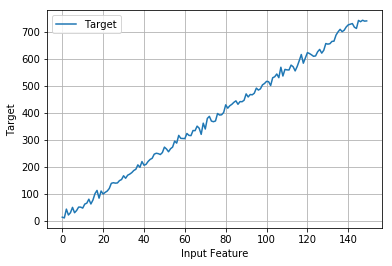

In [8]:
plt.plot(df.x,df.y,label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [9]:
# Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(df[['x']],df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print('Coefficients:',reg.coef_,'Intercept:',reg.intercept_)

Coefficients: [4.99342639] Intercept: 9.095553826738524


<h4>Predict Y for different weights</h4>

In [9]:
# True function weight is  w1 = 5 and w0 = 8.  5*x + 8
w0 = [10,3,10,15,100]
w1 = [0,19,25,6,3]

In [10]:
y_predicted = {}
for i in range(len(w1)):
    y_predicted['{0}-{1}'.format(w0[i],w1[i])] = predicted_at_weight(w0[i],w1[i], x)

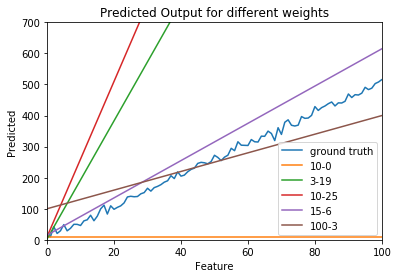

In [11]:
plt.plot(x,y,label='ground truth')

for w in y_predicted.keys():
    plt.plot(x,y_predicted[w],label=w)

plt.xlim(0,100)
plt.ylim(0,700)
plt.xlabel('Feature')
plt.ylabel('Predicted')
plt.title('Predicted Output for different weights')
plt.legend()
plt.show()

<h4>Squared Loss</h4>

In [12]:
for w in y_predicted.keys():
    squared_loss = (y-y_predicted[w])**2
    print('Weight:{0}\tLoss: {1:10.2f}'.format(w, squared_loss.mean()))

Weight:10-0	Loss:  184575.00
Weight:3-19	Loss: 1444121.26
Weight:10-25	Loss: 2974822.07
Weight:15-6	Loss:    8549.24
Weight:100-3	Loss:   10874.60


<h4>Plot Loss at different weights for x</h4>

In [13]:
# For a set of weights, let's find out loss or cost
# True Function: 5x+8
# Linear Regression algorithm iteratively tries to find the correct weight for x.
# Let's test how the lost changes at different weights for x.

# In this example, let's see how the "loss" changes for different weights
weight = pd.Series(np.linspace(3,7,100))

In [14]:
print(weight[:5])
print()
print(weight[-5:])

0    3.000000
1    3.040404
2    3.080808
3    3.121212
4    3.161616
dtype: float64

95    6.838384
96    6.878788
97    6.919192
98    6.959596
99    7.000000
dtype: float64


<h4>Compute Loss using Squared Loss Function</h4>
<h4>loss = average((true - predicted)^2)</h4>

In [15]:
# Cost/Loss Calculation: Squared loss function...a measure of how far is predicted value from actual
# Steps :

#  For every weight for feature x, predict y
#  Now, find out loss by = average ((actual - predicted)**2)

loss_at_wt = []
for w1 in weight:
    y_predicted = predicted_at_weight(8,w1,x)
    
    squared_error = (y - y_predicted)**2
    
    # Average Squared Error at weight w1
    loss_at_wt.append(squared_error.mean())

In [16]:
min(loss_at_wt)

107.87912518145515

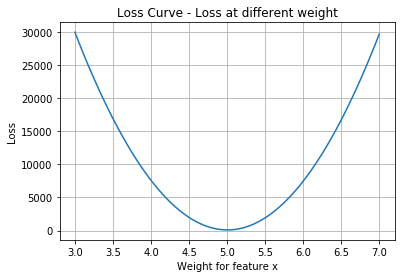

In [17]:
#plt.scatter(x=weight, y=loss_at_wt)
plt.plot(weight,loss_at_wt)
plt.grid(True)
plt.xlabel('Weight for feature x')
plt.ylabel('Loss')
plt.title('Loss Curve - Loss at different weight')
plt.show()

<h4>Summary</h4>
<h4>Squared Loss Function</h4>
Squared Loss is the average of the squared difference between predicted and actual value.  This loss function not only gives us loss at a given weight; it also tells us which direction to go to minimize loss.<br>
For a given weight, the algorithm finds the slope
<ul>
<li>If the slope is negative, then increase the weight</li>
<li>If the slope is positive, then decrease the weight</li>
</ul>

<h4>Learning Rate</h4>
Learning Rate parameter controls how much the weight should be increased or decreased<br>
Too big of a change, the algorithm will skip the point where loss is minimal<br>
Too small of a change, the algorithm will take several iterations to find the optimal weight<br>


<h4>Gradient Descent</h4>
Gradient Descent optimization computes the loss and slope, then adjusts the weights of all the features.<br>
It iterates this process until it finds the optimal weight.<br>
There are three flavors of Gradient descent:<br>

<h4>Batch Gradient Descent</h4>
Batch gradient descent computes loss for all examples in the training set and then adjusts the weight<br>
It repeats this process for every iteration.<br>
This process can be slow to converge when you have a large training data set<br>


<h4>Stochastic Gradient Descent</h4>
With Stochastic Gradient Descent, the algorithm computes loss for the next training example and immediately adjusts the weights.  This approach can help in converging to optimal weights for large data sets.<br>
However, one problem with this approach is algorithm is adjusting weights based on a single example [our end objective is to find weight that works for all training examples and not for the immediate example], and this can result in wild fluctuation in weights.<br>


<h4>Mini-Batch Gradient Descent</h4>
Mini-batch Gradient descent combines benefit of Stochastic and Batch Gradient descent.<br>
It adjusts the weight by testing few samples. The number of samples is defined by mini-batch size, typically around 128.<br>
The mini-batch approach can be used to compute loss in parallel.<br>
This technique is prevalent in deep learning and other algorithms.<br>

